#1. Install Dependencies and Setup



In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.9
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
aiosqlite                                0.21.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.2
altair                                   5.5.0
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                                    4.11.0
anywidget                          

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
gpus=tf.config.list_physical_devices('GPU')
# cpus=tf.config.list_physical_devices('CPU')
# len(gpus)
# len(cpus)

#2. Remove dodgy images

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

/tmp/ipython-input-3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
import os
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_exts[2]

'bmp'

In [12]:
for image_class in os.listdir('/content/data'):
  # print(image_class)
  for image in os.listdir(os.path.join('/content/data', image_class)):
    print(image)

Happy-People-2.jpeg
images (147).jpeg
happy-smiley-face-balloons-against-colorful-cotton-royalty-f.jpg
images (62).jpeg
image (15).jpeg
images (76).jpeg
1140-joyfulwomandancing.jpg
images (91).jpeg
images (133).jpeg
images.png
happy-big-moment-feature_1320W_JR-1.png
images (25).png
images (113).jpeg
image (23).jpeg
images (24).jpeg
images (18).png
0x0.jpg
images (108).jpeg
images (104).jpeg
images (12).jpeg
how-to-be-happy.jpg
happy-smile-emoticon-expression-vector.jpg
images (135).jpeg
images (137).jpeg
images (27).jpeg
images (101).jpeg
image (13).jpeg
drDaOxV1TnAcHK7e_vk5qPUj1Q28z2oBqri9fRwf6BGbbudMzQZr7NlibIKE.jpeg
images (136).jpeg
13075200.png
getty_152414899_97046097045006_68075.webp
65df254481d4ddd0c527a642_10-Common-Traits-Among-Happy-People.jpeg
images (152).jpeg
yellow-smiling-ball-wearing-a-straw-hat-in-a-sunny-field-of-.jpeg
images (1).jpeg
images (66).jpeg
images (34).jpeg
images (9).jpeg
images (86).jpeg
shutterstock_149301761.jpg
images.jpeg
images (141).jpeg
images (12

In [13]:
cv2.imread(os.path.join('/content/data/happy/0x0.jpg'))



array([[[ 34, 132, 166],
        [ 60, 158, 192],
        [ 80, 178, 212],
        ...,
        [112, 205, 226],
        [112, 205, 226],
        [112, 205, 226]],

       [[ 41, 139, 173],
        [ 63, 161, 195],
        [ 81, 179, 213],
        ...,
        [112, 205, 226],
        [112, 205, 226],
        [112, 205, 226]],

       [[ 52, 150, 184],
        [ 69, 167, 201],
        [ 81, 179, 213],
        ...,
        [110, 205, 225],
        [110, 205, 225],
        [110, 205, 225]],

       ...,

       [[ 73, 176, 215],
        [ 69, 174, 213],
        [ 67, 172, 211],
        ...,
        [ 41, 154, 210],
        [ 41, 154, 210],
        [ 42, 155, 211]],

       [[ 70, 175, 216],
        [ 68, 173, 214],
        [ 66, 171, 212],
        ...,
        [ 42, 156, 209],
        [ 42, 156, 209],
        [ 43, 157, 210]],

       [[ 68, 173, 214],
        [ 67, 172, 213],
        [ 64, 170, 211],
        ...,
        [ 43, 157, 210],
        [ 44, 158, 211],
        [ 44, 158, 211]]

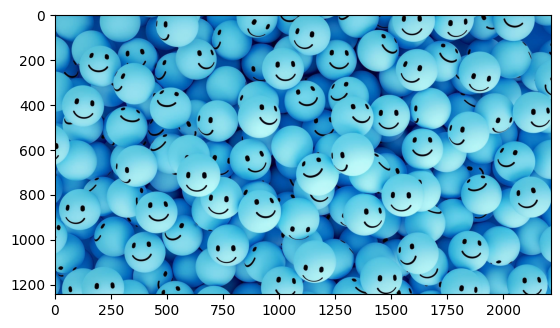

In [14]:
img=cv2.imread(os.path.join('/content/data/happy/0x0.jpg'))
# print(type(img))
# img.shape
plt.imshow(img)



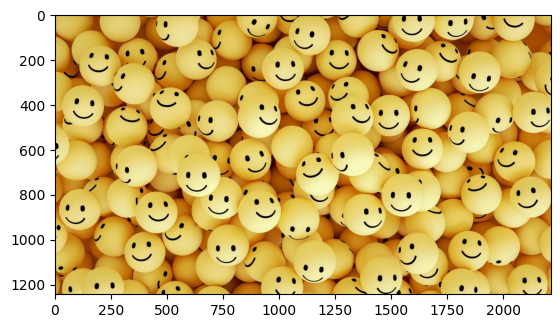

In [15]:
img=cv2.imread(os.path.join('/content/data/happy/0x0.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [16]:
for image_class in os.listdir('/content/data'):
    for image in os.listdir(os.path.join('/content/data', image_class)):
        image_path = os.path.join('/content/data', image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/data/happy/getty_152414899_97046097045006_68075.webp
Image not in ext list /content/data/happy/getty_505175324_2000131020009280327_186071.webp
Image not in ext list /content/data/happy/171120-smile-stock-njs-333p.jpg
Image not in ext list /content/data/happy/image.gif
Image not in ext list /content/data/happy/istock-508455188-033183f45ba393ed4745b2dd1213c390.jpg
Image not in ext list /content/data/sad/pexels-photo-670720.jpeg
Image not in ext list /content/data/sad/sadgirl.jpg
Image not in ext list /content/data/sad/woman-sitting-on-wooden-planks-2865901-1-scaled.jpg
Image not in ext list /content/data/sad/man-with-head-down.jpg


#3. Load Data

In [18]:
tf.data.Dataset??

In [86]:
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
#Help about ??

In [19]:
tf.keras.utils.image_dataset_from_directory??

In [20]:
data=tf.keras.utils.image_dataset_from_directory('/content/data')

Found 418 files belonging to 2 classes.


In [21]:
print(data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [22]:
data_iterator=data.as_numpy_iterator()

In [25]:
#Get another batch from the iterator
batch=data_iterator.next()


In [26]:
batch

(array([[[[ 24.       ,  26.       ,  25.       ],
          [ 25.       ,  27.       ,  26.       ],
          [ 25.       ,  27.       ,  26.       ],
          ...,
          [ 32.       ,  34.       ,  33.       ],
          [ 32.       ,  34.       ,  33.       ],
          [ 32.       ,  34.       ,  33.       ]],
 
         [[ 24.       ,  26.       ,  25.       ],
          [ 25.       ,  27.       ,  26.       ],
          [ 25.       ,  27.       ,  26.       ],
          ...,
          [ 31.       ,  33.       ,  32.       ],
          [ 31.       ,  33.       ,  32.       ],
          [ 31.       ,  33.       ,  32.       ]],
 
         [[ 24.       ,  26.       ,  25.       ],
          [ 25.       ,  27.       ,  26.       ],
          [ 25.       ,  27.       ,  26.       ],
          ...,
          [ 30.3125   ,  32.3125   ,  31.3125   ],
          [ 30.3125   ,  32.3125   ,  31.3125   ],
          [ 30.3125   ,  32.3125   ,  31.3125   ]],
 
         ...,
 
         [[ 

In [27]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [28]:

#Class 1= Sad PPL
#Class 0 = Happy PPL
batch[1]


array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)

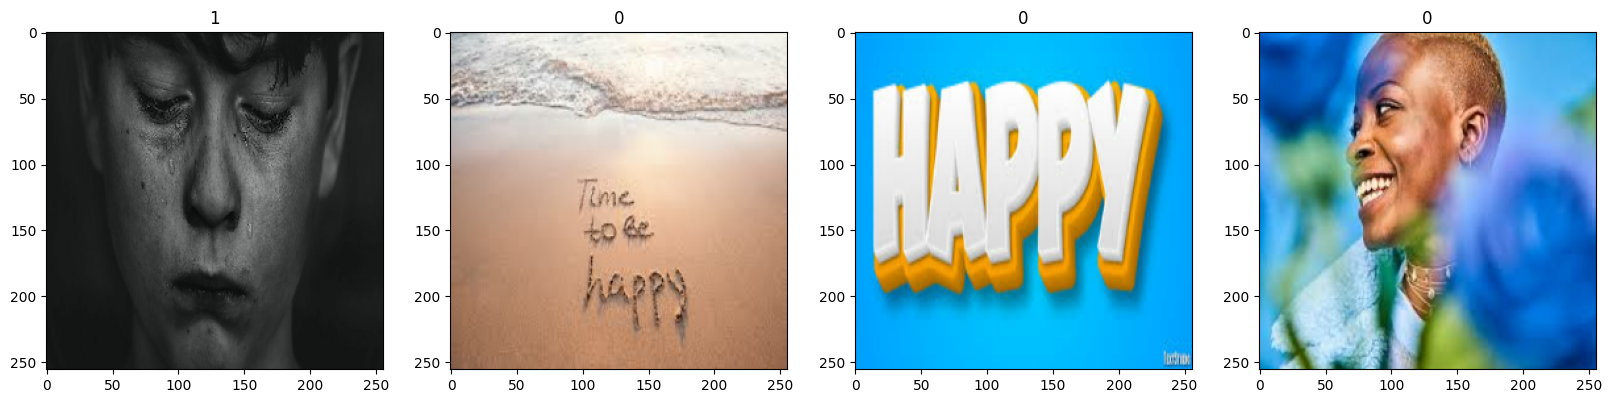

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
scaled=batch[0]/255

In [43]:
# scaled.min()
scaled.max()

np.float32(1.0)

In [46]:
seled_iterator=data.as_numpy_iterator()

In [44]:
data = data.map(lambda x,y: (x/255, y))

In [45]:
data.as_numpy_iterator().next()

(array([[[[0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          ...,
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ]],
 
         [[0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          ...,
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ]],
 
         [[0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          ...,
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ],
          [0.99215686, 0.85490197, 0.        ]],
 
         ...,
 
         [[0.99215686, 0.85490197, 0.        ],
          [0.99215

In [49]:
batch[0].min()

np.float32(0.0)

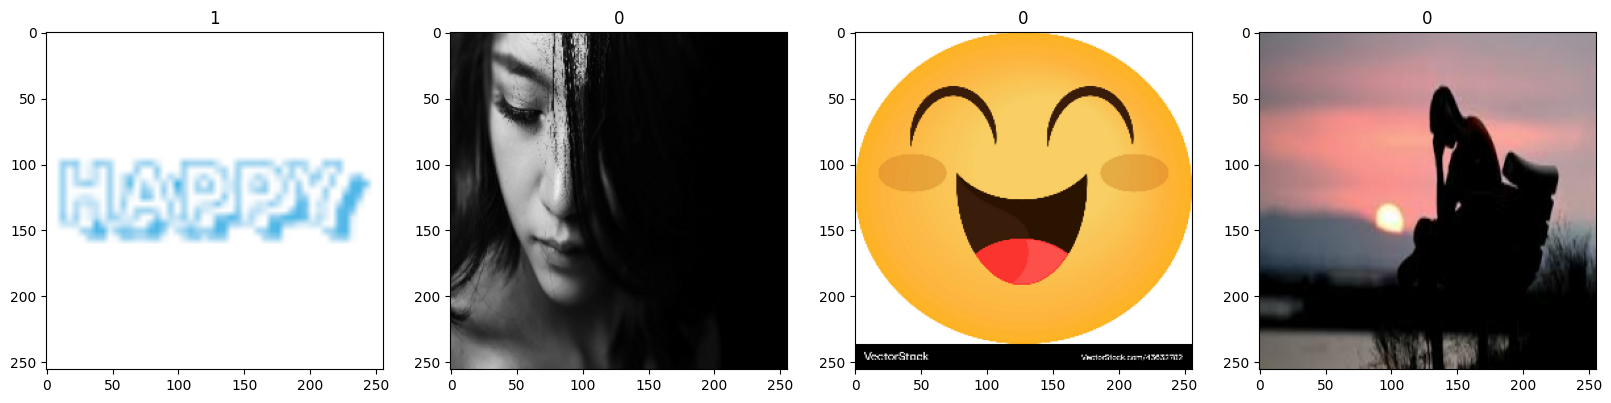

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][14:18]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Split Data

In [53]:
len(data)

14

In [55]:
14*.2

2.8000000000000003

In [56]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [58]:
train_size

9

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#6. Build Deep Learning Model

In [61]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [68]:
MaxPooling2D??

In [64]:
model = Sequential()

In [65]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#7. Train

In [69]:
logdir='logs'

In [70]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [71]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5222 - loss: 0.7719 - val_accuracy: 0.6094 - val_loss: 0.6238
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6846 - loss: 0.5529 - val_accuracy: 0.6719 - val_loss: 0.4973
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6824 - loss: 0.4982 - val_accuracy: 0.7812 - val_loss: 0.3903
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7946 - loss: 0.4490 - val_accuracy: 0.8594 - val_loss: 0.3471
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8553 - loss: 0.3267 - val_accuracy: 0.7969 - val_loss: 0.4765
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8506 - loss: 0.3482 - val_accuracy: 0.8750 - val_loss: 0.3073
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8590 - loss: 0.3828 - val_accuracy: 0.9375 - val_loss: 0.2526
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8947 - loss: 0.2794 - val_accuracy: 0.9531 - val_loss: 0.1684
Epoch 9/

In [72]:
hist

In [74]:
hist.history

{'accuracy': [0.5902777910232544,
  0.6701388955116272,
  0.7013888955116272,
  0.8263888955116272,
  0.8680555820465088,
  0.8368055820465088,
  0.8958333134651184,
  0.8888888955116272,
  0.90625,
  0.9583333134651184,
  0.9409722089767456,
  0.9618055820465088,
  0.9652777910232544,
  0.9756944179534912,
  0.9791666865348816,
  0.9756944179534912,
  0.9861111044883728,
  0.9895833134651184,
  0.9895833134651184,
  0.9965277910232544],
 'loss': [0.6997320652008057,
  0.5528228878974915,
  0.4850809872150421,
  0.405095636844635,
  0.32877570390701294,
  0.3499614894390106,
  0.32617083191871643,
  0.28199735283851624,
  0.23398712277412415,
  0.16208478808403015,
  0.185676708817482,
  0.1338643580675125,
  0.09377631545066833,
  0.08787402510643005,
  0.07196512073278427,
  0.07439397275447845,
  0.04700883477926254,
  0.034413814544677734,
  0.026915641501545906,
  0.019195357337594032],
 'val_accuracy': [0.609375,
  0.671875,
  0.78125,
  0.859375,
  0.796875,
  0.875,
  0.9375,
 

#8. Plot Performance

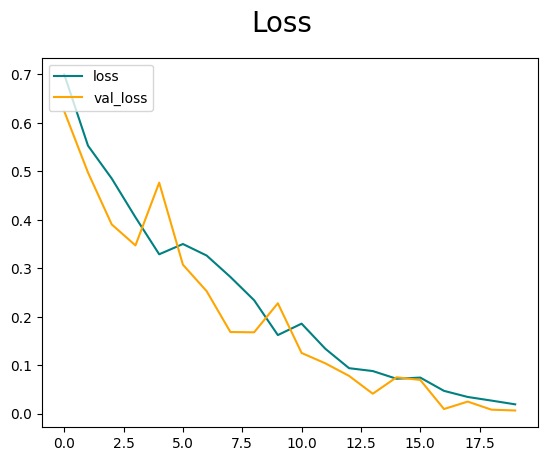

In [75]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

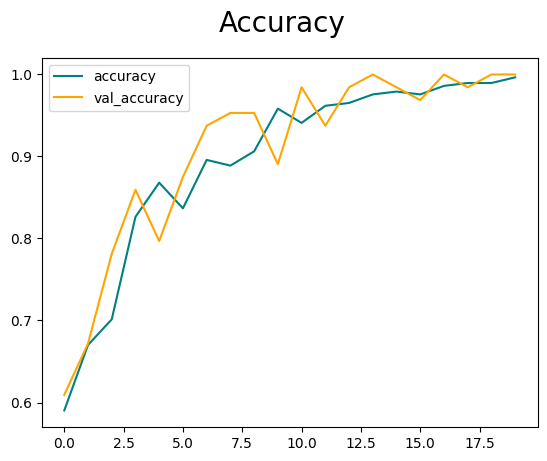

In [76]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#9. Evaluate

In [77]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [79]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step


In [80]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


#10. Test

In [81]:
import cv2

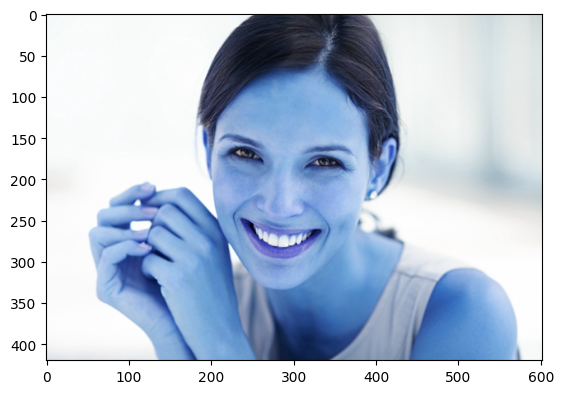

In [82]:
img = cv2.imread('/content/data/happy/iStock_000015424718Small.jpg')
plt.imshow(img)
plt.show()

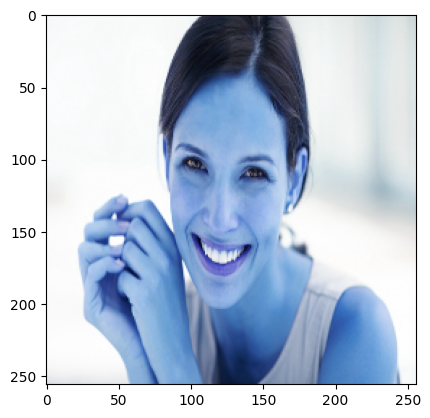

In [83]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


In [87]:
yhat

array([[9.94910896e-01],
       [9.82942224e-01],
       [9.98287678e-01],
       [9.99489248e-01],
       [4.87628015e-04],
       [7.85970455e-10],
       [9.95617568e-01],
       [3.56404646e-03],
       [7.56174586e-07],
       [1.13339738e-07],
       [1.06529165e-02],
       [4.68189176e-09],
       [9.99999881e-01],
       [2.58343713e-03],
       [9.98643696e-01],
       [1.21326069e-03],
       [9.99985695e-01],
       [2.81301211e-03],
       [2.52705195e-05],
       [7.03369686e-03],
       [3.69756803e-04],
       [1.38264243e-03],
       [9.90015745e-01],
       [3.97610722e-10],
       [3.91607231e-04],
       [1.49429470e-04],
       [3.69553059e-01],
       [4.15477785e-04],
       [1.19774323e-03],
       [1.50751875e-04],
       [9.78923440e-02],
       [4.75281477e-03]], dtype=float32)

In [89]:
np.expand_dims(resize/255, 0).shape

(1, 256, 256, 3)

In [90]:
resize.shape

TensorShape([256, 256, 3])

In [91]:
np.expand_dims(resize, 0)

array([[[[244.64062, 248.67969, 248.     ],
         [245.29297, 249.95407, 249.63187],
         [244.3789 , 248.3789 , 249.3789 ],
         ...,
         [204.     , 216.     , 216.     ],
         [202.66797, 214.66797, 216.66797],
         [203.21646, 215.21646, 217.21646]],

        [[246.     , 248.     , 248.     ],
         [245.038  , 249.038  , 250.038  ],
         [244.97574, 248.97574, 249.97574],
         ...,
         [205.68915, 216.96094, 216.96094],
         [204.02734, 216.02734, 217.9748 ],
         [202.71484, 215.67578, 217.67578]],

        [[246.     , 248.     , 248.     ],
         [245.     , 249.     , 250.     ],
         [246.51035, 249.75253, 250.5246 ],
         ...,
         [207.     , 217.     , 217.     ],
         [203.61246, 215.61246, 217.55777],
         [203.60156, 216.     , 218.     ]],

        ...,

        [[225.67578, 229.27734, 234.27734],
         [225.63446, 229.61801, 234.61801],
         [227.20312, 230.20312, 234.80469],
         ...,


In [94]:
yhat

array([[0.9806735]], dtype=float32)

In [95]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


#11. Save the Model

In [96]:
from tensorflow.keras.models import load_model

In [98]:
model.save(os.path.join('/content/models','happysadmodel.h5'))

In [99]:
model.save("my_model.keras")


In [101]:
new_model = load_model('/content/models/happysadmodel.h5')

In [103]:
from tensorflow import keras


model = keras.models.load_model("my_model.keras")

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [104]:
new_model

<Sequential name=sequential, built=True>

In [105]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [106]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
